In [1]:
!python -m pip install gurobipy

     ---------------------------------------- 9.7/9.7 MB 60.6 kB/s eta 0:00:00


In [1]:
from gurobipy import *

# ------Linear Programming Problem using gurobipy-----------

# Creating an optimization model

### Model constructor. initially no variables or variables

#### Model(name = " ")

In [2]:
opt_mod = Model(name = "Linear program")

Restricted license - for non-production use only - expires 2024-10-28


# Adding Decision Variables

In [3]:
x = opt_mod.addVar(name = 'x', vtype = GRB.CONTINUOUS, lb = 0)
y = opt_mod.addVar(name = 'y', vtype = GRB.CONTINUOUS, lb = 0)

# Define the objective function

In [4]:
obj_fn = 5*x + 4*y
opt_mod.setObjective(obj_fn, GRB.MINIMIZE)

# Adding the constraints

In [5]:
c1 = opt_mod.addConstr( x + y >= 8, name = "c1")
c2 = opt_mod.addConstr( 2*x + y >= 10, name = "c2")
c3 = opt_mod.addConstr( x + 4*y >= 11, name = "c3")

# Solve the model

In [6]:
opt_mod.optimize()   # solve the model
opt_mod.write('linear_model.lp')  # output the LP file of the model

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 3 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x6c7cdc94
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [4e+00, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+00, 1e+01]
Presolve time: 0.00s
Presolved: 3 rows, 2 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.850000e+01   0.000000e+00      0s
       2    3.4000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  3.400000000e+01


# Output the result

In [7]:
print('Objective function value: %f' % opt_mod.objVal)

# Get values of the decision variables
for v in opt_mod.getVars():
    print('%s: %g' % (v.varName, v.x))

Objective function value: 34.000000
x: 2
y: 6


# -----Mixed Integer Linear Programming-------------

# Eample problem:
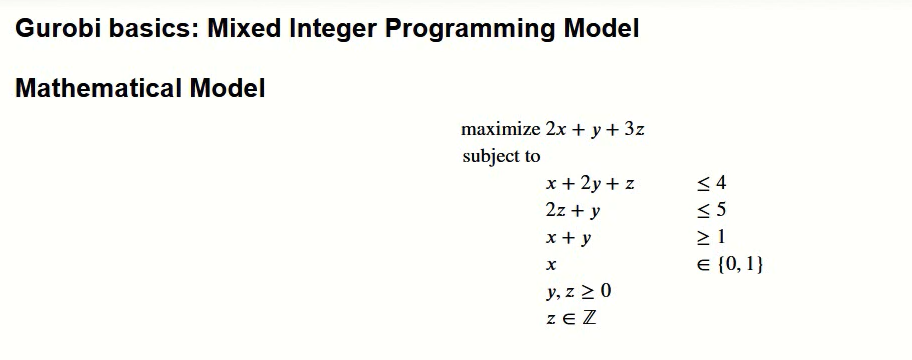

## Creating optimization model instance

In [8]:
milp_model = Model('milp')


## Add decision variables

In [9]:
x = milp_model.addVar(vtype = GRB.BINARY, name = "x")
y = milp_model.addVar(vtype = GRB.CONTINUOUS, lb = 0, name = "y")
z = milp_model.addVar(vtype = GRB.INTEGER, lb = 0, name = "z")

## Define the objective function 

### remember that we wants to maximize the objective function

In [10]:
obj_fn = 2*x + y + 3 * z
milp_model.setObjective(obj_fn, GRB.MAXIMIZE)

## Add the constraints

In [11]:
# Add constrain: x + 2 y + z <= 4
c1 = milp_model.addConstr(x + 2 *y + z <= 4, name = "c1")

# Add the constraint 2 z + y <= 5
c2 = milp_model.addConstr( 2* z + y <= 5, name = "c2")

# add the constraint x + y >= 1
c3 = milp_model.addConstr( x + y >= 1, name = "c3")


## Solve the model

In [12]:
milp_model.optimize()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 3 rows, 3 columns and 7 nonzeros
Model fingerprint: 0x8a1c7e4e
Variable types: 1 continuous, 2 integer (1 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 3e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 3.5000000
Presolve removed 3 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 2: 8.5 3.5 

Optimal solution found (tolerance 1.00e-04)
Best objective 8.500000000000e+00, best bound 8.500000000000e+00, gap 0.0000%


## Output the result

In [13]:
print('objective function value : %.2f' % milp_model.objVal)
# get the values of the decision variables

for v in milp_model.getVars():
    print('%s: %g' % (v.varName, v.x))

objective function value : 8.50
x: 1
y: 0.5
z: 2


# -------------Binary Knapsack problem - optimization using gurobipy--------

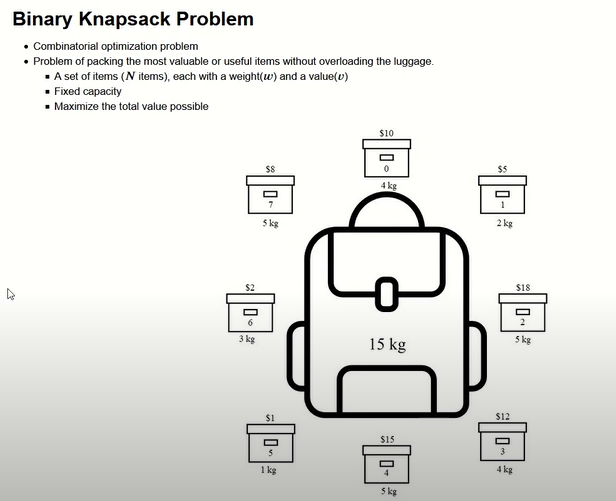

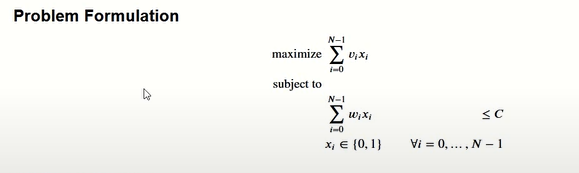

## Creating the data (weights and values)

In [14]:
w = [4, 2, 5, 4, 5, 1, 3, 5]
v = [10, 5, 18, 12, 15, 1, 2, 8]
C = 15
N = len(w)

## Creating model instance 

In [15]:
knapsack_model = Model('knapsack')

## Add decision variables

In [16]:
x = knapsack_model.addVars(N, vtype = GRB.BINARY, name = "x")

## Defining the objective function

##### sum_(i=1)^(N w_(i) * x_(I) <= C

In [17]:
obj_fn = sum(v[i] * x[i] for i in range(N))
knapsack_model.setObjective(obj_fn, GRB.MAXIMIZE)

## Set the constraints

In [18]:
knapsack_model.addConstr(sum(w[i]*x[i] for i in range(N)) <= C)

<gurobi.Constr *Awaiting Model Update*>

## Solve the model and output the solution

In [19]:
knapsack_model.setParam('OutputFlag', False)
knapsack_model.optimize()

print('Optimization is done. Objective Function Value : %.2f' % knapsack_model.objVal)

for v in knapsack_model.getVars():
    print('%s: %g' % (v.varName, v.x))

Optimization is done. Objective Function Value : 46.00
x[0]: 0
x[1]: 0
x[2]: 1
x[3]: 1
x[4]: 1
x[5]: 1
x[6]: 0
x[7]: 0


# ----------Quadratic Programming----------------

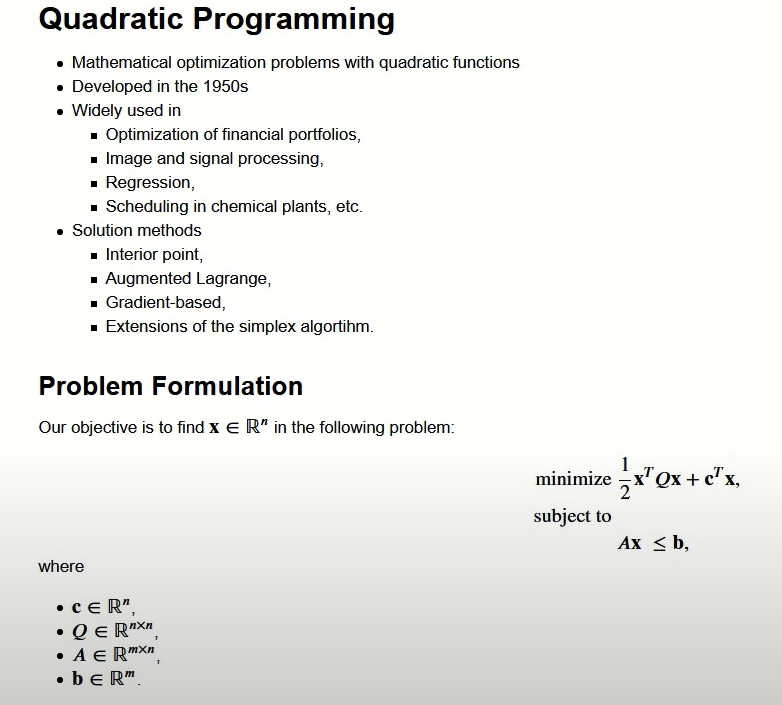
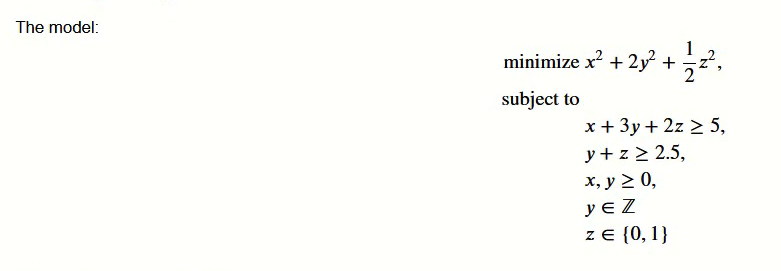

## Creating a model instance

In [20]:
quad_model = Model('quadratic')

## Define decision variables

In [21]:
x = quad_model.addVar(vtype = GRB.CONTINUOUS, lb = 0, name = "x")
y = quad_model.addVar(vtype = GRB.INTEGER, lb =  0, name = "y")
z = quad_model.addVar(vtype = GRB.BINARY, name = "z")

## Defining the objective function

In [22]:
obj_fn = x**2 + 2*y**2 + 0.5*z**2
quad_model.setObjective(obj_fn, GRB.MINIMIZE)

## Add constraints

In [23]:
# x + 3y + 2z >= 5
quad_model.addConstr(x + 3*y + 2*z >= 5)

# y + z >= 2.5
quad_model.addConstr(y + z >= 2.5)

<gurobi.Constr *Awaiting Model Update*>

## Solve the model and output the result 

In [24]:
quad_model.setParam('OutputFlag', False)
quad_model.optimize()

print('Optimization is done. Objective Function Value : %.2f' % quad_model.objVal)
# get the values of decision variables
for v in quad_model.getVars():
    print('%s: %g' % (v.varName, v.x))

Optimization is done. Objective Function Value : 8.50
x: 0
y: 2
z: 1


## ----------Extra Learning ----------------

## Update the type of a decision variable
Let us change the requirement of integrity on the decision variable y.

In [25]:
y.vType = GRB.CONTINUOUS
quad_model.optimize()

print('Optimization is done. Objective Function Value : %.2f' % quad_model.objVal)
# get the values of decision variables
for v in quad_model.getVars():
    print('%s: %g' % (v.varName, v.x))

Optimization is done. Objective Function Value : 5.00
x: 0
y: 1.5
z: 1


## Adding a quadratic constraint

\begin{equation}x^2 >= y^{2} + z^{2}\end{equation}

In [26]:
quad_model.addConstr(x**2 >= y**2 + z**2)
quad_model.optimize()

print('Optimization is done. Objective Function Value : %.2f' % quad_model.objVal)
# get the values of decision variables
for v in quad_model.getVars():
    print('%s: %g' % (v.varName, v.x))

Optimization is done. Objective Function Value : 8.25
x: 1.80278
y: 1.5
z: 1


# --------------Assignment Problem-----------

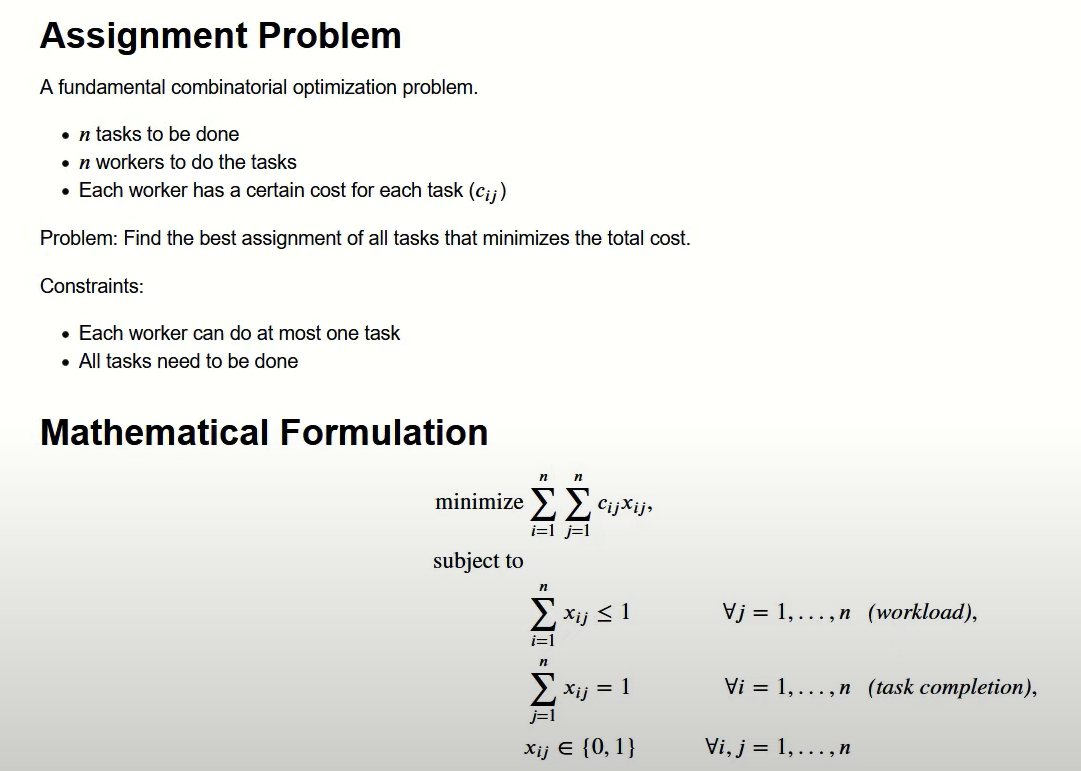
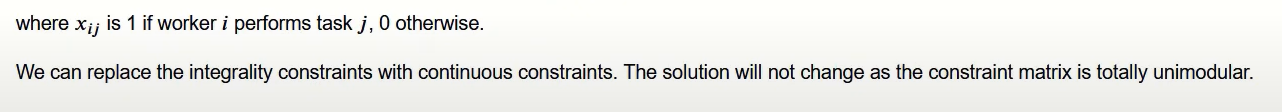

## Creating input data (cost matrix)

In [27]:
import numpy as np
cost = np.random.randint(1, 10, (4, 4))

## Model instance

In [28]:
assign_model = Model('Assignment')

## Creating decision variables

In [29]:
x = assign_model.addVars(cost.shape[0], cost.shape[1], vtype = GRB.BINARY, name = "x")

## Adding the constraints

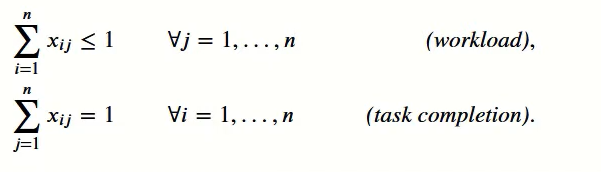

In [30]:
# sum_{i = 1}^{n} x_{ij} <= 1 for all j
assign_model.addConstrs((sum(x[i, j] for i in range(cost.shape[0])) <= 1 
                        for j in range(cost.shape[1])),
                        name = 'workload')

# sum_{j = 1}^{n} x_{ij} = 1 for all i
assign_model.addConstrs((sum(x[i, j] for j in range(cost.shape[1])) == 1 for i in range(cost.shape[0])),
                      name = 'task completion')

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>}

## Define the objective function

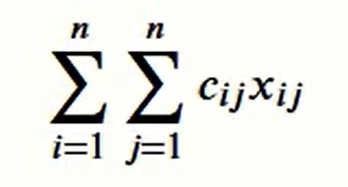


In [31]:
obj_fn = sum(cost[i,j]*x[i, j] for i in range(cost.shape[0]) for j in range(cost.shape[1]))
assign_model.setObjective(obj_fn, GRB.MINIMIZE)

## Solve and inspect the model

In [32]:
assign_model.setParam('OutFlag', False)
assign_model.optimize()

print('Model Statistics')
assign_model.printStats()

print('\n\nModel Output\n')
print(assign_model.display())


print('Optimization is done. Objective Function Value : %.2f' % assign_model.objVal)
# get the values of decision variables
for v in assign_model.getVars():
    print('%s: %g' % (v.varName, v.x))

No parameters matching 'OutFlag' found
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 16 columns and 32 nonzeros
Model fingerprint: 0x298534ce
Variable types: 0 continuous, 16 integer (16 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 9e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 29.0000000
Presolve time: 0.00s
Presolved: 8 rows, 16 columns, 32 nonzeros
Variable types: 0 continuous, 16 integer (16 binary)

Root relaxation: objective 1.500000e+01, 7 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      1

## Relaxing Binary constraints

### we will notice that if binay contraints are released we will still get the same output

In [33]:
assign_mod2 = Model('Assignment_2')

y = assign_mod2.addVars(cost.shape[0], cost.shape[1], vtype = GRB.CONTINUOUS, lb = 0, ub = 1, name = "x")

# sum_{i = 1}^{n} x_{ij} <= 1 for all j
assign_mod2.addConstrs((sum(y[i, j] for i in range(cost.shape[0])) <= 1 
                        for j in range(cost.shape[1])),
                        name = 'work_load')

# sum_{j = 1}^{n} x_{ij} = 1 for all i
assign_mod2.addConstrs((sum(y[i, j] for j in range(cost.shape[1])) == 1 
                      for i in range(cost.shape[0])),
                      name = 'task_completion')

obj_fnn = sum(cost[i,j]*y[i, j] for i in range(cost.shape[0]) for j in range(cost.shape[1]))
assign_mod2.setObjective(obj_fnn, GRB.MINIMIZE)

assign_mod2.setParam('OutputFlag', False)
assign_mod2.optimize()




print('Optimization is done. Objective Function Value : %.2f' % assign_mod2.objVal)
# get the values of decision variables
for v in assign_mod2.getVars():
    print('%s: %g' % (v.varName, v.x))

Optimization is done. Objective Function Value : 15.00
x[0,0]: 1
x[0,1]: 0
x[0,2]: 0
x[0,3]: 0
x[1,0]: 0
x[1,1]: 0
x[1,2]: 0
x[1,3]: 1
x[2,0]: 0
x[2,1]: 0
x[2,2]: 1
x[2,3]: 0
x[3,0]: 0
x[3,1]: 1
x[3,2]: 0
x[3,3]: 0
